In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [2]:
df = pd.read_csv('titanic.csv',index_col=0)

In [3]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Target Variable : Survived
##  Independent Variable : Others

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Handling Missing Values

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
# Age -- NaN replacing with Mean
df.Age.replace(np.NaN,df.Age.mean(),inplace=True)

In [8]:
# Embarked -- NaN replacing with Maximum Weigthed Category
df.Embarked.replace(np.NaN,df.Embarked.value_counts().index[0],inplace=True)


In [9]:
# Cabin -- Dropping Cabin as feature as there are more number of NaN values
df.drop(columns=df[['Cabin','Name','Ticket']],inplace=True)

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Handling Outliers

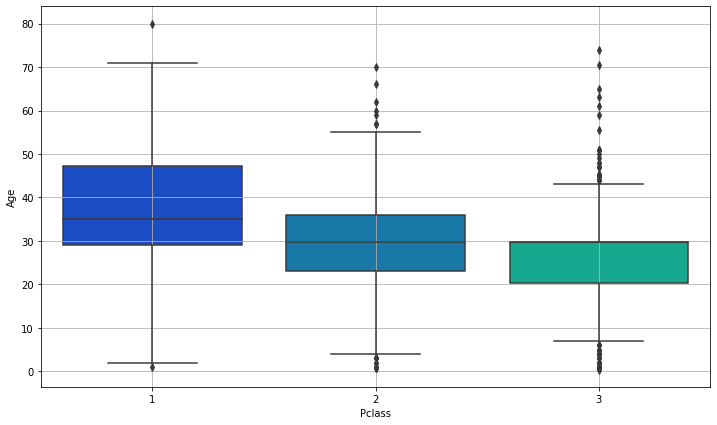

In [11]:
#box plot
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y='Age',data=df,palette='winter')
plt.grid()

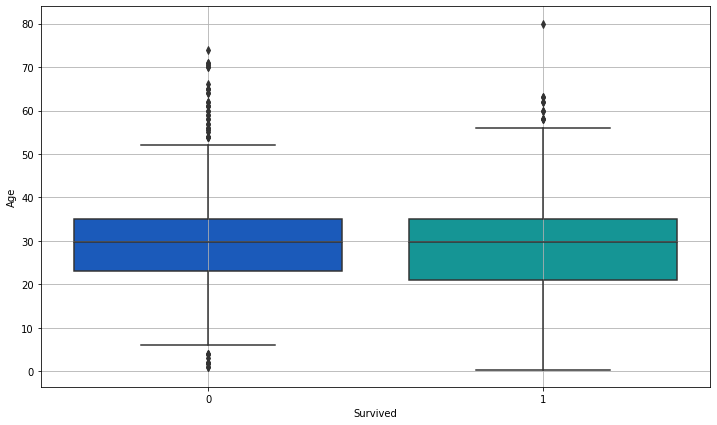

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Survived",y='Age',data=df,palette='winter')
plt.grid()

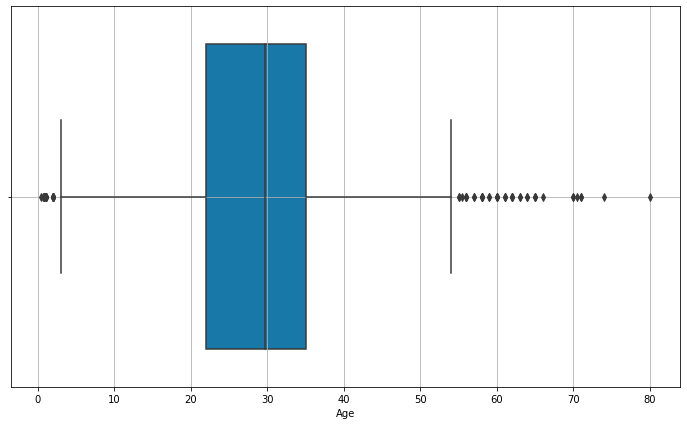

In [13]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Age",data=df,palette='winter')
plt.grid()

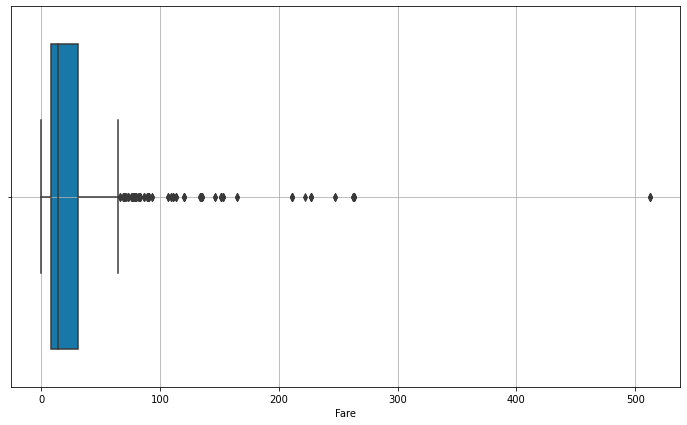

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Fare",data=df,palette='winter')
plt.grid()

In [15]:
print("___Age___")
print(f"Age 2.5 & below ==> { len(df[(df.Age <= 2.5) ]) } records " )
print(f"Age 50-60 ==> { len(df[(df.Age > 50) & (df.Age < 60)]) } records " )
print(f"Age 60-70 ==> { len(df[(df.Age > 60) & (df.Age < 70)]) } records " )
print(f"Age 70 & above ==> { len(df[(df.Age >= 70) ]) } records " )

print("\n___Fare___")
print(f"Fare 80-100 ==> { len(df[(df.Fare > 80) & (df.Fare < 100)]) } records " )
print(f"Fare 100-200 ==> { len(df[(df.Fare > 100) & (df.Fare < 200)]) } records " )
print(f"Fare 200 & above ==> { len(df[(df.Fare >= 200)]) } records " )


___Age___
Age 2.5 & below ==> 24 records 
Age 50-60 ==> 38 records 
Age 60-70 ==> 15 records 
Age 70 & above ==> 7 records 

___Fare___
Fare 80-100 ==> 21 records 
Fare 100-200 ==> 33 records 
Fare 200 & above ==> 20 records 


# Handling Categorial Data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [17]:
# sex -- LabelEncoding
df.Sex = LE.fit_transform(df.Sex)
df.Sex.astype("int64")

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Name: Sex, Length: 891, dtype: int64

In [18]:
# Embarked -- LabelEncoding
df.Embarked = LE.fit_transform(df.Embarked)
df.Embarked.astype("int64")

PassengerId
1      2
2      0
3      2
4      2
5      2
      ..
887    2
888    2
889    2
890    0
891    1
Name: Embarked, Length: 891, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 55.7 KB


In [20]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [22]:
x=df.iloc[:,1:]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.000000,1,0,7.2500,2
2,1,0,38.000000,1,0,71.2833,0
3,3,0,26.000000,0,0,7.9250,2
4,1,0,35.000000,1,0,53.1000,2
5,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
887,2,1,27.000000,0,0,13.0000,2
888,1,0,19.000000,0,0,30.0000,2
889,3,0,29.699118,1,2,23.4500,2


In [23]:
y=df.iloc[:,0]
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [26]:
models=[]
accuracy=[]
models.append(("logistic regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
for name,model in models:
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)


In [27]:
ac_array=np.array(accuracy)

In [28]:
ac_array

array([0.77238806, 0.75373134])

In [29]:
ac_array.mean()

0.7630597014925373

# Bagging

In [30]:
from sklearn.ensemble import BaggingClassifier

In [31]:
bg=BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       153
           1       0.76      0.68      0.72       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [32]:
bg=BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       153
           1       0.78      0.62      0.69       115

    accuracy                           0.76       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268



In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       153
           1       0.78      0.62      0.69       115

    accuracy                           0.76       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268



In [35]:
from sklearn.ensemble import VotingClassifier

In [36]:
models

[('logistic regression', LogisticRegression()),
 ('Decision Tree', DecisionTreeClassifier())]

In [37]:
vc=VotingClassifier(estimators=models)
vc.fit(xtrain,ytrain)
ypred=vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       153
           1       0.90      0.54      0.67       115

    accuracy                           0.78       268
   macro avg       0.82      0.75      0.75       268
weighted avg       0.80      0.78      0.76       268



# Boosting

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:
bo=AdaBoostClassifier(LogisticRegression())
bo.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       153
           1       0.78      0.62      0.69       115

    accuracy                           0.76       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268



In [43]:
bo=AdaBoostClassifier(DecisionTreeClassifier())
bo.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       153
           1       0.78      0.62      0.69       115

    accuracy                           0.76       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268



In [44]:
from sklearn.ensemble import GradientBoostingRegressor